In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

from textblob import TextBlob

import re

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os

In [2]:
df_tri=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Trigram_Combine NEW.csv',header=None,names=["Trigram","No. of Repetations"])
#np.random.seed(0))
#np.random.seed(0))
df_tri.head()

,Trigram,No. of Repetations
0,red nviolets blue,331
1,nviolets blue got,331
2,valentinesday covid roses,329
3,covid roses red,329
4,roses red nviolets,329


In [3]:
df_bi=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Bigram_Combine NEW.csv',header=None,names=["Bigram","No. of Repetations"])
#np.random.seed(0))
df_bi.head()

,Bigram,No. of Repetations
0,covid cases,464
1,new cases,347
2,valentinesday covid,331
3,red nviolets,331
4,nviolets blue,331


In [4]:
df_uni=pd.read_csv(r'C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Unigram_Combine NEW.csv',header=None,names=["Unigram","No. of Repetations"])
df_uni.head()

,Unigram,No. of Repetations
0,covid,5968
1,cases,1454
2,coronavirus,1353
3,new,1258
4,deaths,584


In [5]:
df_tri.columns
tweet3=df_tri.copy()
df_bi.columns
tweet2=df_bi.copy()
df_uni.columns
tweet1=df_uni.copy()

In [6]:
tweet3.head()

,Trigram,No. of Repetations
0,red nviolets blue,331
1,nviolets blue got,331
2,valentinesday covid roses,329
3,covid roses red,329
4,roses red nviolets,329


In [7]:
print(tweet1.shape)
print(tweet2.shape)
print(tweet3.shape)

(17780, 2)
(54937, 2)
(58041, 2)


In [8]:
tweet3['sentiment'] = ' '
tweet3['polarity'] = None
for i,tweets in enumerate(tweet3.Trigram) :
    blob = TextBlob(tweets)
    tweet3['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet3['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet3['sentiment'][i] = 'negative'
    else :
        tweet3['sentiment'][i] = 'neutral'
tweet3.head(30)

,Trigram,No. of Repetations,sentiment,polarity
0,red nviolets blue,331,neutral,0.0
1,nviolets blue got,331,neutral,0.0
2,valentinesday covid roses,329,neutral,0.0
3,covid roses red,329,neutral,0.0
4,roses red nviolets,329,neutral,0.0
5,blue got vaccines,316,neutral,0.0
6,gmt coronavirus coronavirusupdate,204,neutral,0.0
7,coronavirus coronavirusupdate covid,203,neutral,0.0
8,coronavirusupdate covid coronaviruspandemi,203,neutral,0.0
9,new covid cases,172,positive,0.136364


In [9]:
tweet1['sentiment'] = ' '
tweet1['polarity'] = None
for i,tweets in enumerate(tweet1.Unigram) :
    blob = TextBlob(str(tweets))
    tweet1['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet1['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet1['sentiment'][i] = 'negative'
    else :
        tweet1['sentiment'][i] = 'neutral'
tweet1.head()

,Unigram,No. of Repetations,sentiment,polarity
0,covid,5968,neutral,0.0
1,cases,1454,neutral,0.0
2,coronavirus,1353,neutral,0.0
3,new,1258,positive,0.136364
4,deaths,584,neutral,0.0


In [10]:
tweet2['sentiment'] = ' '
tweet2['polarity'] = None
for i,tweets in enumerate(tweet2.Bigram) :
    blob = TextBlob(tweets)
    tweet2['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        tweet2['sentiment'][i] = 'positive'
    elif blob.sentiment.polarity < 0 :
        tweet2['sentiment'][i] = 'negative'
    else :
        tweet2['sentiment'][i] = 'neutral'
tweet2.head(30)

,Bigram,No. of Repetations,sentiment,polarity
0,covid cases,464,neutral,0.0
1,new cases,347,positive,0.136364
2,valentinesday covid,331,neutral,0.0
3,red nviolets,331,neutral,0.0
4,nviolets blue,331,neutral,0.0
5,blue got,331,neutral,0.0
6,covid roses,329,neutral,0.0
7,roses red,329,neutral,0.0
8,got vaccines,316,neutral,0.0
9,new covid,286,positive,0.136364


In [11]:
tweet3.describe()

,No. of Repetations
count,58041.000000
mean,1.304750
std,4.239845
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,331.000000


In [12]:
tweet1.describe()

,No. of Repetations
count,17780.000000
mean,5.261361
std,51.168333
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,5968.000000


In [13]:
tweet2.describe()

,No. of Repetations
count,54937.000000
mean,1.540619
std,5.874779
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,464.000000


In [14]:
tweet3.groupby('sentiment').size()

sentiment
negative     4327
neutral     45680
positive     8034
dtype: int64

In [15]:
tweet1.groupby('sentiment').size()

sentiment
negative      302
neutral     17146
positive      332
dtype: int64

In [16]:
tweet2.groupby('sentiment').size()

sentiment
negative     2939
neutral     47051
positive     4947
dtype: int64

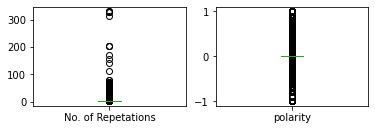

In [17]:
import matplotlib.pyplot as plt
tweet3.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

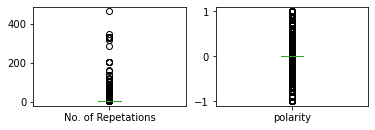

In [18]:
import matplotlib.pyplot as plt
tweet2.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

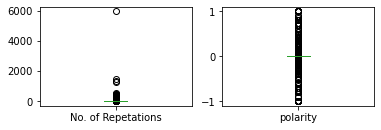

In [19]:
import matplotlib.pyplot as plt
tweet1.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

In [20]:
tweet3.groupby('polarity').size()

polarity
-1.000     84
-0.900      4
-0.900      1
-0.875      5
-0.800     75
         ... 
 0.800    199
 0.850      9
 0.850      2
 0.900     30
 1.000    154
Length: 360, dtype: int64

In [21]:
clo=['sentiment','Trigram','polarity','No. of Repetations']
dataset3=tweet3.reindex(columns=clo)
#dataset2.head()
dataset3[:10]


,sentiment,Trigram,polarity,No. of Repetations
0,neutral,red nviolets blue,0.0,331
1,neutral,nviolets blue got,0.0,331
2,neutral,valentinesday covid roses,0.0,329
3,neutral,covid roses red,0.0,329
4,neutral,roses red nviolets,0.0,329
5,neutral,blue got vaccines,0.0,316
6,neutral,gmt coronavirus coronavirusupdate,0.0,204
7,neutral,coronavirus coronavirusupdate covid,0.0,203
8,neutral,coronavirusupdate covid coronaviruspandemi,0.0,203
9,positive,new covid cases,0.136364,172


In [22]:
clo=['sentiment','Bigram','polarity','No. of Repetations']
dataset2=tweet2.reindex(columns=clo)
#dataset2.head()
dataset2[:10]

,sentiment,Bigram,polarity,No. of Repetations
0,neutral,covid cases,0.0,464
1,positive,new cases,0.136364,347
2,neutral,valentinesday covid,0.0,331
3,neutral,red nviolets,0.0,331
4,neutral,nviolets blue,0.0,331
5,neutral,blue got,0.0,331
6,neutral,covid roses,0.0,329
7,neutral,roses red,0.0,329
8,neutral,got vaccines,0.0,316
9,positive,new covid,0.136364,286


In [23]:
clo=['sentiment','Unigram','polarity','No. of Repetations']
dataset1=tweet1.reindex(columns=clo)
#dataset2.head()
dataset1[:10]

,sentiment,Unigram,polarity,No. of Repetations
0,neutral,covid,0.0,5968
1,neutral,cases,0.0,1454
2,neutral,coronavirus,0.0,1353
3,positive,new,0.136364,1258
4,neutral,deaths,0.0,584
5,neutral,amp,0.0,518
6,neutral,people,0.0,461
7,neutral,vaccines,0.0,450
8,neutral,covi,0.0,425
9,neutral,omicron,0.0,417


In [27]:
dataset3.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Trigram_Combine NEW sent pol .csv",index=False)

In [26]:
dataset2.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Bigram_Combine NEW sent pol.csv",index=False)
dataset1.to_csv(r"C:\Users\DELL\Desktop\RNTU\dataset prepared\Covid19\covid combine\COVID19__combine Unigram_Combine NEW sent pol.csv",index=False)